Q2: 
    
    a)Choose an arbitrary image from given set of images. Create two noisy images from it; i.e., one by adding the Gaussian noise and the other one by adding the salt-and-pepper noise.
    
    b) Try denoising these images with median and averaging filters. Comment on the results. Which filter is more appropriate for the types of the noises?

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import matplotlib.image as mpimg 

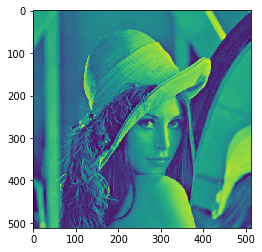

In [2]:
img = cv2.imread('lena.tif',-1)
# cv2.imshow('img',img)
# cv2.waitKey(0)

# img = mpimg.imread('lena.tif') 
plt.imshow(img)

## Gaussian noise

In [3]:
gauss = np.random.normal(0,1,img.shape)
noisy = img + gauss

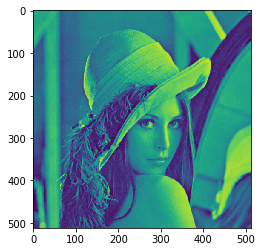

In [4]:
plt.imshow(noisy)

## Salt and pepper noise

In [5]:
s_vs_p = 0.5
amount = 0.05
out = np.copy(img)
# Salt mode
num_salt = np.ceil(amount * img.size * s_vs_p)
coords = [np.random.randint(0, i - 1, int(num_salt)) for i in img.shape]
out[coords] = 1

# Pepper mode
num_pepper = np.ceil(amount* img.size * (1. - s_vs_p))
coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in img.shape]
out[coords] = 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':


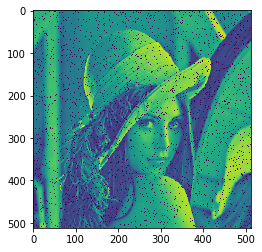

In [6]:
plt.imshow(out)

## Denoising image using median filter

In [7]:
from scipy.signal import medfilt2d

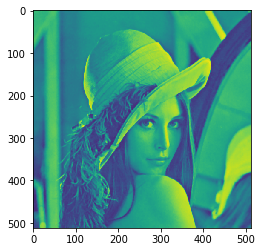

In [8]:
dst = medfilt2d(noisy) ##Gaussian
plt.imshow(dst)

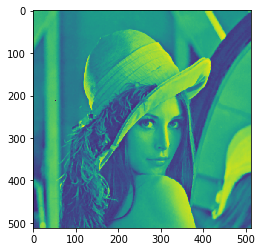

In [9]:
dst = medfilt2d(out) ##Salr n pepper
plt.imshow(dst)

##  Denoising image using averaging filter

In [10]:
from scipy.ndimage import filters

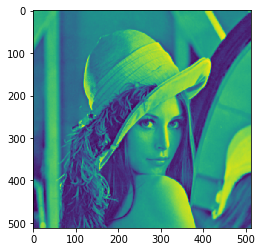

In [11]:
dAvgf = filters.uniform_filter(noisy)
plt.imshow(dAvgf)

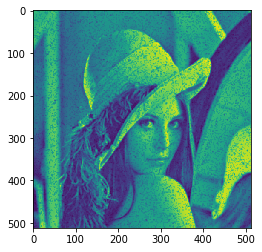

In [12]:
dAvgfil = filters.uniform_filter(out)
plt.imshow(dAvgfil)

## From the above plots, for guassian noise, it is better to use average filter and median filter for salt and pepper noise.